In [18]:
# Load python modules
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tqdm import tqdm
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix
import seaborn as sn  
import cv2

In [2]:
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    """
        Load the data from local folder
        
    """
    
    datasets = ['C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/train_ds',
               'C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/test_ds']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Dataset Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Dataset Loading C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/train_ds


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 171.61it/s]


Dataset Loading C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/test_ds


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 167.27it/s]


In [5]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((160, 64, 64, 3), (60, 64, 64, 3))

In [6]:
# Shuffle only the training dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=123)

In [7]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 160


In [8]:
#Scale image data from 0 to 1 
train_images = train_images / 255.0 
test_images = test_images / 255.0

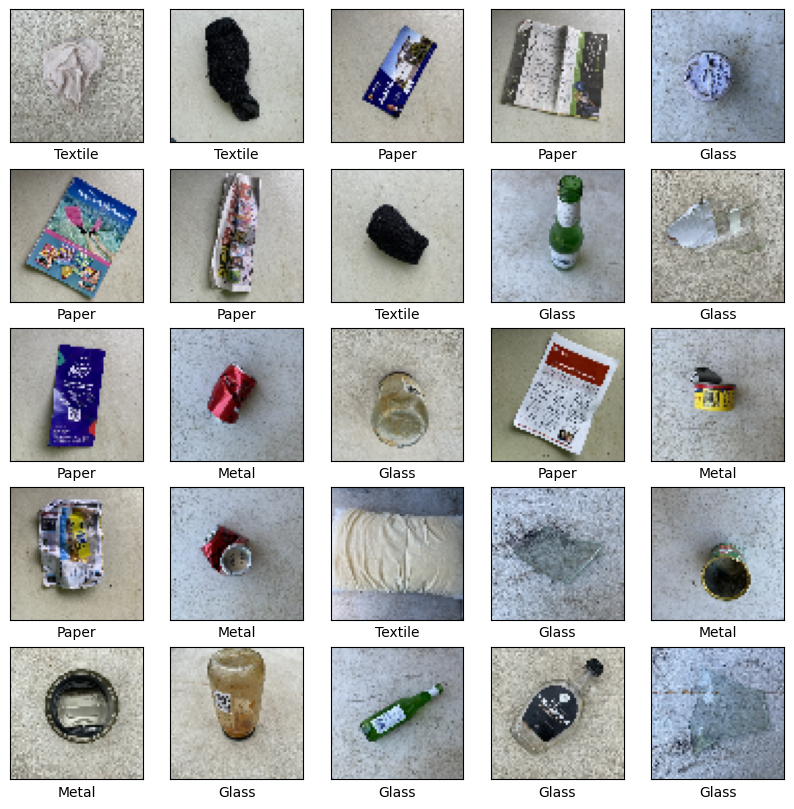

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
#Sequential Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,64,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,863,236 (7.11 MB)

 Trainable params: 1,863,236 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model_1.fit(train_images, train_labels, batch_size=4, epochs=30, validation_split = 0.2)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.2631 - loss: 1.8597 - val_accuracy: 0.2812 - val_loss: 1.3814
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4148 - loss: 1.3660 - val_accuracy: 0.5000 - val_loss: 1.2987
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4565 - loss: 1.2613 - val_accuracy: 0.6250 - val_loss: 1.2149
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5442 - loss: 1.0624 - val_accuracy: 0.3750 - val_loss: 1.2158
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5577 - loss: 1.0078 - val_accuracy: 0.5312 - val_loss: 1.1598
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5326 - loss: 0.9824 - val_accuracy: 0.6250 - val_loss: 1.0210
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7214 - loss: 0.6054 - val_accuracy: 0.6875 - val_loss: 0.9559
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8261 - loss: 0.5958 - val_accuracy: 0.4062 - v

Text(0.5, 1.0, 'Model Accuracy')

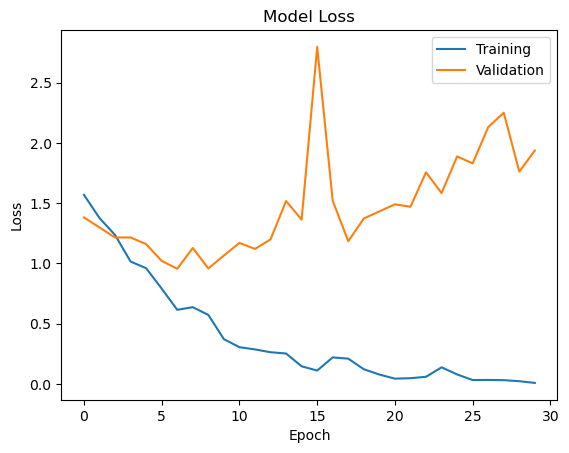

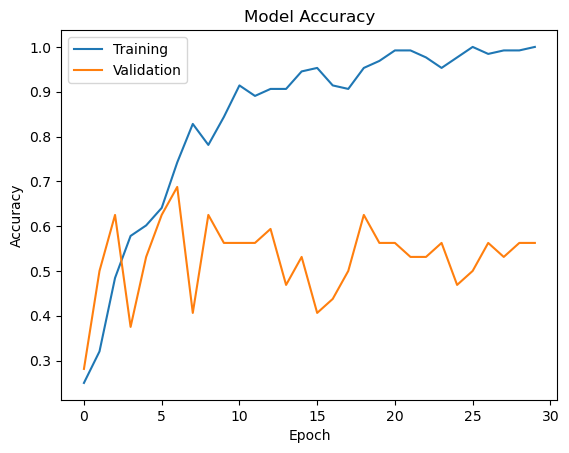

In [13]:

#Plot the training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

In [14]:
test_loss = model_1.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6201 - loss: 1.8874 


In [16]:
predictions = model_1.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


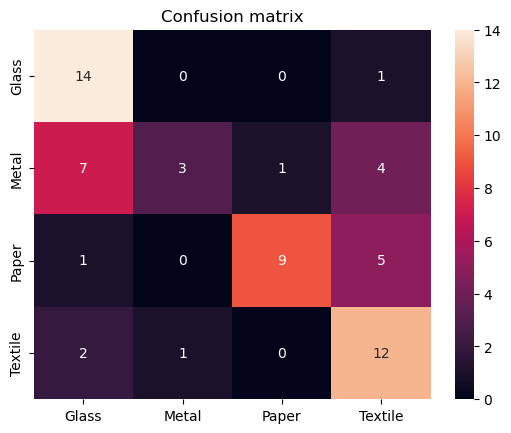

In [19]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()